## Fake News Prediction using Natural Language Processing 

In [2]:
## importing necessary packages

import pandas as pd
import numpy as np
import spacy
import re

In [3]:
# loading the dataset
df = pd.read_csv('../Data/train.csv')
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [4]:
# dimension of the dataframe
df.shape
# selecting only first 6000 rows because the dataset is big to be handled
df = df.iloc[:6000,:]

In [5]:
# checking for null values 
df.isnull().sum()

id          0
title     163
author    584
text       12
label       0
dtype: int64

In [6]:
# dropping na values and resetting the index
df = df.dropna().reset_index()

In [7]:
# checking shape after removal of na values
df.shape

(5253, 6)

In [8]:
# we dont need "id" column, so dropping it
df = df.drop(['id'], axis=1)
df.head()

index                                              title  \
0      0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1      1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      2                  Why the Truth Might Get You Fired   
3      3  15 Civilians Killed In Single US Airstrike Hav...   
4      4  Iranian woman jailed for fictional unpublished...   

               author                                               text  \
0       Darrell Lucus  House Dem Aide: We Didn’t Even See Comey’s Let...   
1     Daniel J. Flynn  Ever get the feeling your life circles the rou...   
2  Consortiumnews.com  Why the Truth Might Get You Fired October 29, ...   
3     Jessica Purkiss  Videos 15 Civilians Killed In Single US Airstr...   
4      Howard Portnoy  Print \nAn Iranian woman has been sentenced to...   

   label  
0      1  
1      0  
2      1  
3      1  
4      1

In [ ]:
### removing special characters
##def removeSpecialChars(mystring):
##    mystring = mystring.lower()
##    return re.sub('[^A-Za-z0-9 ]+', '', str(mystring))

In [ ]:
## storing processed text output in new column
##df['procecssed_text'] = df['text'].apply(lambda x: removeSpecialChars(x))
##df['procecssed_text'].head()

In [10]:
## removing stopwords and lemmatization using spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
import en_core_web_sm
# nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()


In [11]:
# function to lemmatize the sentences and removing stopwords present in it
word_corpus = []
def lemmatizeAndStopwordsRem(string):
    string = string.lower()
    string = re.sub('[^A-Za-z]+', ' ', str(string)) # removing everything except alphabets
    string = nlp(string)
    processed = []
    for word in string:
        word = word.lemma_
        if str(word) not in nlp.Defaults.stop_words:
            processed.append(word)
    processed = " ".join(processed)
    word_corpus.append(processed)
    return processed


In [12]:
# applying function on complete "text" column
df['processed'] = df['text'].apply(lambda x: lemmatizeAndStopwordsRem(x))
df['processed']

0       house dem aide didn t comey s letter jason cha...
1       feeling life circle roundabout head straight l...
2       truth fire october tension intelligence analys...
3       video civilian kill single airstrike identify ...
4       print iranian woman sentence year prison iran ...
                              ...                        
5248    hillary clinton s campaign announce proposal w...
5249    utah republican sen mike lee tell audience was...
5250    disgrace new york congressman anthony weiner p...
5251    breitbart news head copy editor adrienne ross ...
5252      view november broadcast king world news dire...
Name: processed, Length: 5253, dtype: object

In [13]:
# CountVectorizer to create a vector of every word(it actually counts a term frequency of every word) AKA one_hot_encoding
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000, ngram_range= (1,3)) # ngram_range specifies min and max size of ngrams  

In [14]:
# checking no of words in random row
# len(max(word_corpus))
len(word_corpus[118].split(" "))
# word_corpus[50]

584

In [15]:
x = cv.fit_transform(word_corpus).toarray()
y = df['label']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [17]:
cv.get_feature_names()[:2]

['aaron', 'abandon']

In [18]:
processed_df = pd.DataFrame(X_train, columns = cv.get_feature_names())
processed_df.head()

aaron  abandon  abbott  abc  abc news  abe  abedin  abide  ability  able  \
0      0        0       0    0         0    0       0      0        0     0   
1      0        0       0    0         0    0       0      0        0     0   
2      0        0       0    0         0    0       0      0        0     2   
3      0        0       0    0         0    0       0      0        0     0   
4      0        0       0    0         0    0       0      0        0     0   

   ...  ypg  zealand  zero  zero hedge  zika  zika virus  zinke  zionist  \
0  ...    0        0     0           0     0           0      0        0   
1  ...    0        0     0           0     0           0      0        0   
2  ...    0        0     0           0     0           0      0        0   
3  ...    0        7     0           0     0           0      0        0   
4  ...    0        0     0           0     0           0      0        0   

   zone  zu  
0     0   0  
1     0   0  
2     0   0  
3     0   0  
4     0   0  

[5 rows x 7000 columns]

## Naive Bayes Algorithm  

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix
classifier = MultinomialNB()

In [20]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9124643196955281


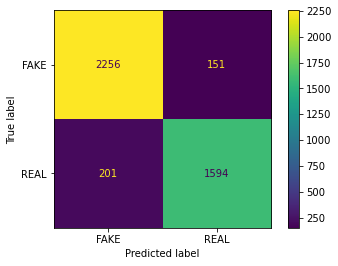

In [22]:
plot_confusion_matrix(classifier, X_train, y_train, display_labels=['FAKE','REAL'])

We can see that acccuracy of Naive Bayes is ~91%.

we will try SVM classifier which also does great in case of text data

### SVM-SGD

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
svm_clf = SGDClassifier(loss='hinge', alpha=0.001, random_state=42)
svm_clf.fit(X_train, y_train)


SGDClassifier(alpha=0.001, random_state=42)

In [25]:
y_preds = svm_clf.predict(X_test)
accuracy= accuracy_score(y_test, y_preds)
print(accuracy)

0.928639391056137


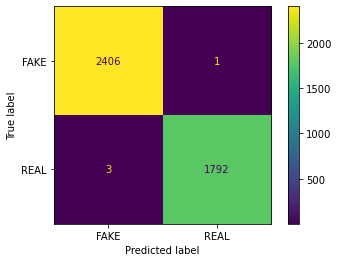

In [26]:
## creating confusion matrix 
plot_confusion_matrix(svm_clf, X_train, y_train, display_labels=['FAKE','REAL'])

Here we can see that the accuracy of SVM classifier(~0.93) is better than NaiveBayes(0.91).

### LSTM

we will try with LSTM for classification of text

In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [28]:
vocab_size = 6000

In [29]:
# one hot representation of words. It will create a vector for every word where only that index will be 1 where the word is present
one_hot_rep = [one_hot(word, vocab_size) for word in word_corpus]
one_hot_rep

[[3573,
  3977,
  3542,
  2761,
  3338,
  2540,
  5242,
  2744,
  1520,
  122,
  1247,
  3084,
  423,
  2850,
  1243,
  1520,
  122,
  3017,
  1903,
  1912,
  5128,
  5302,
  3325,
  305,
  3076,
  2333,
  177,
  5877,
  640,
  3470,
  5060,
  5018,
  1654,
  1404,
  4353,
  1585,
  2014,
  3705,
  4544,
  454,
  2540,
  3131,
  3573,
  2889,
  3542,
  3057,
  2199,
  2670,
  2947,
  1404,
  4353,
  4113,
  2540,
  3276,
  5645,
  2744,
  3877,
  3705,
  3057,
  1254,
  3550,
  3147,
  1921,
  5242,
  1254,
  5433,
  4229,
  1835,
  1969,
  870,
  2761,
  3338,
  1217,
  2540,
  5819,
  1247,
  1950,
  870,
  5446,
  2670,
  2540,
  5607,
  1950,
  5446,
  2889,
  4229,
  4950,
  3573,
  2113,
  3138,
  1745,
  870,
  1705,
  1733,
  1254,
  5247,
  5880,
  5268,
  4684,
  1244,
  1169,
  5968,
  2744,
  1745,
  870,
  5446,
  1520,
  122,
  5710,
  5507,
  1585,
  3712,
  1247,
  3705,
  4725,
  2155,
  3157,
  3705,
  2058,
  2162,
  1254,
  1905,
  1165,
  34,
  4238,
  521,
  1520,

In [33]:
# now we have to give it to embedding layer but for this we need every sentence to be of same length which can be done by using 
# pad_sequences which padds zeros at the end or start of the sentence.
sen_length = 400
embedded_doc = pad_sequences(one_hot_rep, padding='post', maxlen=sen_length)

In [34]:
len(embedded_doc)

5253

In [35]:
embedded_doc[50]

array([5329,  718, 5573, 3480, 1620, 3573, 1950, 4578,  631, 5778, 4907,
       1262,  455, 5242, 5956, 3935, 5955, 4420, 1620, 2801, 2695, 4651,
       2019, 5000, 4420, 2748, 3474, 4763, 4765, 1479, 5242,  904, 1404,
       2794, 5822, 3600, 2816, 5864, 5778, 5210, 5868, 4693, 2473,  241,
       4265, 5734, 5778,  127,   10, 2695, 4651, 1114, 1262, 5778, 4121,
        573, 2952, 1262, 5136, 1239, 1950, 1387, 1314,  338, 5164, 3027,
        374, 3935, 5955, 3185, 4420, 5778, 4184, 1239, 2186,   22, 5219,
       1684, 5501, 3600, 3367, 3930, 3973, 3600, 2231, 5778, 3261, 2921,
       1684, 1180,  531, 3039, 3083, 3338, 2823, 5641, 3930, 1295, 2297,
       2485, 5726, 5778,  741, 5469,  280, 4950,  913,  721, 2803, 1966,
        167,  186, 4423, 4994, 5984, 5095, 3730, 3747, 4566, 5883,  886,
       5844, 3712,  503, 4346, 3930, 5641, 5629, 4824, 1225, 1935,  288,
       5118,  288, 1011, 5839, 2019, 5486, 1745, 1903, 3600, 5429, 5178,
       4332, 5778,  741, 2748, 4265, 5629, 2801,  1

In [36]:
# model creation
embedding_vec_features = 100 # features for creating word embedding 
model = Sequential()
model.add(Embedding(vocab_size, embedding_vec_features, input_length = sen_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 100)          600000    
_________________________________________________________________
dropout (Dropout)            (None, 400, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 680,501
Trainable params: 680,501
Non-trainable params: 0
_________________________________________________________________


In [38]:
# here we have to provide embedded data as input to the LSTM  
X = np.array(embedded_doc)
y = np.array(y)

In [39]:
X.shape

(5253, 400)

In [40]:
y.shape

(5253,)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=32)

Train on 3677 samples, validate on 1576 samples
Epoch 1/5
3677/3677 [==============================] - 71s 19ms/sample - loss: 0.6709 - acc: 0.5766 - val_loss: 0.6176 - val_acc: 0.5926
Epoch 2/5
3648/3677 [============================>.] - ETA: 0s - loss: 0.5324 - acc: 0.6686

In [ ]:
# prediction on test data
y_pred = model.predict_classes(X_test)

In [ ]:
# checking accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)